In [16]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import imutils
imName="starfieldLateAug.png"

1. Generate the master map from the Excel file corresponding to the LEDs' coordinates on the ceiling.

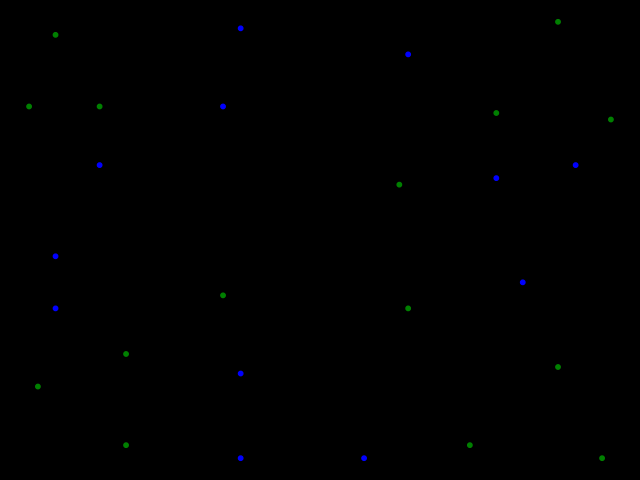

In [17]:
#Read and process data
xls = pd.read_excel("Star Field LED Placement.xlsx", sheet_name="Sheet1")

xlsEdited=xls[['X','Y','COLOR']].dropna() # Remove rows without data
xlsReplaced=xlsEdited.replace(to_replace='GRN',value='green')
xlsReplaced=xlsReplaced.replace(to_replace='BLU',value='blue')
x=xlsReplaced["X"]
y=xlsReplaced["Y"]
c=xlsReplaced['COLOR']
x=x.to_numpy()  # Change the dataframe to a numPy array
y=y.to_numpy()  # This is because missing rows were still counted in the Series

#Start the Plot
plt.style.use('dark_background')
mpl.rcParams['savefig.pad_inches'] = 0
ax = plt.axes((0.,0.,1.,1.), frameon=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

#Generate master map of coloured stars
plt.scatter(x,y,c=c, s=10)

plt.savefig(imName, dpi=100)
plt.show()

2. Translate the image so that the point at the centre of the sample image becomes the centre of the overall image. The image generates its own border on the top and left when translating, but to reach points in the far right and bottom, it's necessary to draw a border around the image on those sides.  All-black portions of the image correspond to real images of the walls of the testbed. These would be removed in processing, and no stars would be visible. 

In [18]:
image=cv2.imread(imName)

imHeight=image.shape[0]
imWidth=image.shape[1]

sampleHeight=300
sampleWidth=400
bordered =cv2.copyMakeBorder(image, 
                             top=0,
                             left=0,
                             bottom=int(imHeight/2),
                             right=int(imWidth/2),
                             borderType = cv2.BORDER_CONSTANT)

In [19]:
print(imHeight)
print(imWidth)

480
640


3.  Rotate the image around the point, and take the sample image as a rectangle centred at that point.

In [20]:
m=0
stride=10
image=bordered 
outputDir="/users/antoniahoffman/Images/LateAugData"
import os
#for i in range(0,2):
#  for j in range(0,2):
for i in range(0,imHeight,stride):
  for j in range(0,imWidth,stride):

    cenTest=(j,i)
    yShift=image.shape[0]/2 -cenTest[1]
    xShift=image.shape[1]/2 -cenTest[0]
    cenX=cenTest[0]
    cenY=cenTest[1]
    M=np.float32([[1, 0, xShift],[0,1,yShift]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    for angle in range(5,365,5):
      rotated=imutils.rotate_bound(shifted,angle)
      rotCenX=int(rotated.shape[1]/2)
      rotCenY=int(rotated.shape[0]/2)
      # Then take the rectangle centred at that point as the sample image
      imsample=rotated[rotCenY-int(sampleHeight/2):rotCenY+int(sampleHeight/2), rotCenX-int(sampleWidth/2):rotCenX+int(sampleWidth/2)]
      
      name=f'X{int(cenX)}Y{int(cenY)}T{angle}.png'
      fname=os.path.join(outputDir, name)
      cv2.imwrite(fname, imsample)
      m+=1
print(m)

221184
